In [1]:
#About this file:
#Generates fake height CME data to test the velocity functions
#After creating this fake height data, we then add noise to it to see whether or not the noise creates
#a sinusoidal curve
#The fake height data is created in a value called 'h' defined in the block below
#The fake height data with noise is created in 'noise_h'
#The velocity function we are testing is created in 'v'
#The velocity that we get from the derivative of 'h' should match 'v'

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, 'C:/Users/Betsy/Documents/TCD/cmevo/functions')
import cme_graphing

In [2]:
#based off Dec 19, 1996 data
delta_time = 50.0 * 60.0 # 50 minutes apart for recordings, times 60 to get seconds 50
h_0 = 2.76 * 6.95700e8 #height is 2.76 solar radius, in km. Grabbed from 1996
v_0 = 100  *1000 #velocity is 100 km/s
a_0 = 2 # m/s^2

time = np.arange(0.0, 1400.0*60, delta_time)
h = h_0 + (v_0 * time) + (0.5 * (time**2) * a_0) #fake height data
noise_h = h + (h * np.random.normal(scale=0.05, size=len(h))) #data with noise

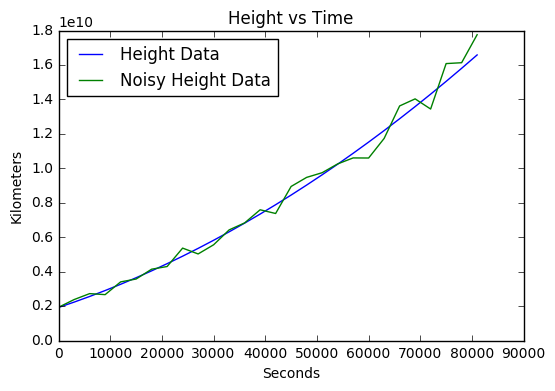

In [3]:
plt.title("Height vs Time")
plt.xlabel('Seconds')
plt.ylabel('Kilometers')
plt.plot(time, h, label='Height Data')
plt.plot(time, noise_h, label='Noisy Height Data')
plt.legend(loc=2)

v=185.041351 m/s, h=1.120225 R_Sun
a=2.529132 m/s^2, v=82.611507 km/s, h=3.034251 R_Sun
a=2.981570 m/s, v=70.145154 
this is popt:  74.6175085035 2.98156988285


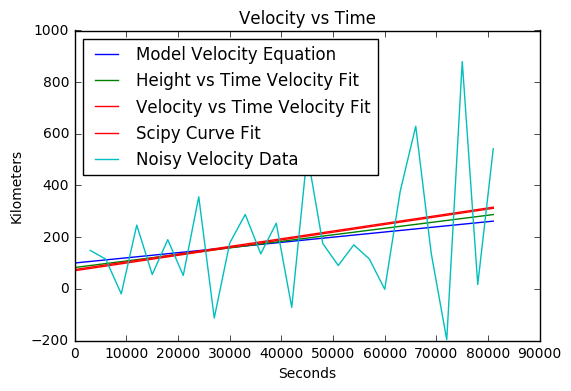

In [15]:
#Velocity 1: Model equation
v = cme_graphing.velocity(time, v_0, a_0) #velocity function (in m/s) (also fitting function)
v_noise = np.random.normal(scale=0.05, size=len(h))
v_data = v + v_noise

#Velocity 2: Linear Algebra Least-squares method
A = np.vstack([time, np.ones(len(time))]).T
lin = np.linalg.lstsq(A, noise_h)[0] #grabs values for velocity
A = np.vstack([time**2, time, np.ones(len(time))]).T
quad = np.linalg.lstsq(A, noise_h)[0] #grabs values for acceleration and velocity
fit_noisy_h = quad[1] + (time * quad[0]*2) #quad1=velocity, quad0=acceleration
print('v=%f m/s, h=%f R_Sun' % (lin[0]/1000, lin[1]/6.95700e8))
print('a=%f m/s^2, v=%f km/s, h=%f R_Sun' % ((quad[0]*2), quad[1]/1000, quad[2]/6.95700e8))

#Velocity 3: GOOD
noisy_v=cme_graphing.get_derivative(noise_h, time)
A = np.vstack([time, np.ones(len(time))]).T
lin = np.linalg.lstsq(A[1:], noisy_v)[0]
fit_noisy_v = lin[1] + (time * lin[0])
print('a=%f m/s, v=%f ' % (lin[0], lin[1]/1000))

#Velocity 4: Plt curve fit function
popt, pcov = curve_fit(cme_graphing.velocity, time[:-1]+(time[1:]-time[0:-1])*0.5, noisy_v)
print ("this is popt: ", popt[0]/1000, popt[1])

#Plotting
plt.title("Velocity vs Time")
plt.xlabel('Seconds')
plt.ylabel('Kilometers')
plt.plot(time, v/1000, label='Model Velocity Equation')
plt.plot(time, fit_noisy_h/1000, label='Height vs Time Velocity Fit')
plt.plot(time, fit_noisy_v/1000, label='Velocity vs Time Velocity Fit')
plt.plot(time, cme_graphing.velocity(time, *popt)/1000, 'r-', label='Scipy Curve Fit')
plt.plot(time[1:], noisy_v/1000, label='Noisy Velocity Data')
plt.legend(loc=2)


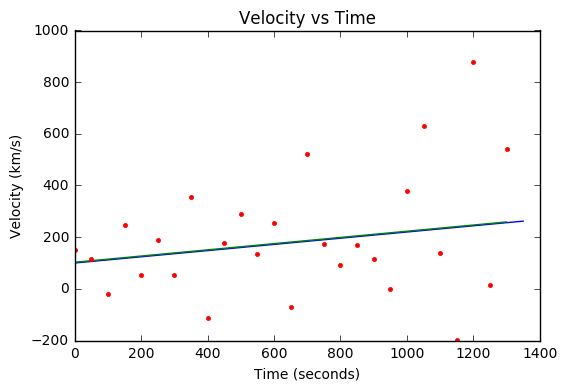

In [5]:
#Plot Velocity vs Time
diff_height_data=np.diff(h)
diff_time_data=np.diff(time)
velocity=diff_height_data/(diff_time_data.astype(float))
#for the noisy data
diff_noise_h_data=np.diff(noise_h)
noise_v=diff_noise_h_data/(diff_time_data.astype(float))

plt.title("Velocity vs Time")
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (km/s)')
plt.plot(time/60, v/1000)
plt.plot(time[:-1]/60, velocity/1000)
plt.plot(time[:-1]/60, noise_v/1000, '.')
plt.show()